In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('../data/lead_procesado.csv', index_col=0)  

In [3]:
df

,Edad,IngresoMensual,Contactado,CuotaPrestamosVigentes,CantidadPrestamo,PeriodoPrestamo,TasaInteres,CuotaPrestamoSolicitado,Var1,NoIncluyeCantidad,...,EmpleadoVariable2_EmpVar2D,EmpleadoVariable2_EmpVar2ND,TipoSucursal_TipoSucursalND,TipoSucursal_TipoSucursalP,CategoriaFuente_FuenteB,CategoriaFuente_FuenteC,CategoriaFuente_FuenteD,CategoriaFuente_FuenteE,CategoriaFuente_FuenteF,CategoriaFuente_FuenteG
ID,,,,,,,,,,,,,,,,,,,,,
APPC90493171225,43,2000.0,0,0.0,0,0,0.00,0,0,1,...,1,0,0,1,0,0,0,0,0,1
APPD40611263344,36,3500.0,1,0.0,20000,2,13.25,953,10,0,...,0,0,0,1,0,0,0,0,0,1
APPE70289249423,40,2250.0,1,0.0,45000,4,0.00,0,0,0,...,1,0,0,0,1,0,0,0,0,0
APPF80273865537,33,3500.0,1,0.0,92000,5,0.00,0,7,0,...,1,0,0,0,1,0,0,0,0,0
APPG60994436641,37,10000.0,1,2500.0,50000,2,0.00,0,10,0,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
APPU90955789628,39,4900.0,0,0.0,0,0,0.00,0,10,1,...,0,0,0,1,0,0,0,0,0,1
APPV80989824738,51,7190.1,0,1450.0,0,0,0.00,0,7,1,...,1,0,0,1,0,0,0,0,0,1
APPW50697209842,30,1600.0,1,0.0,24000,4,35.50,943,2,0,...,1,0,0,1,0,0,0,0,0,1


## Analizar la distribución de la variable objetivo ("Aprobado")

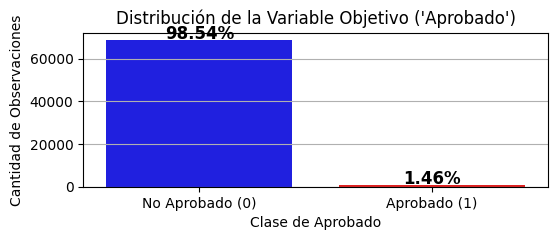

Distribución de la variable objetivo en porcentaje:
Aprobado
0    98.536858
1     1.463142
Name: count, dtype: float64


In [36]:
# Cargar el dataset
df = pd.read_csv('../data/lead_procesado.csv', index_col=0)

# Contar la cantidad de instancias por clase
class_counts = df["Aprobado"].value_counts()
total_samples = class_counts.sum()

# Calcular el porcentaje de cada clase
class_counts_percentage = (class_counts / total_samples) * 100

# Crear gráfico de barras con valores absolutos y porcentajes
plt.figure(figsize=(6, 2))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette=["blue", "red"], legend=False)

# Agregar etiquetas en cada barra con el porcentaje
for i, value in enumerate(class_counts.values):
    plt.text(i, value + 500, f"{class_counts_percentage[i]:.2f}%", ha='center', fontsize=12, fontweight='bold')

# Configuración del gráfico
plt.xticks([0, 1], labels=["No Aprobado (0)", "Aprobado (1)"])
plt.ylabel("Cantidad de Observaciones")
plt.xlabel("Clase de Aprobado")
plt.title("Distribución de la Variable Objetivo ('Aprobado')")
plt.grid(axis="y")

# Mostrar gráfico
plt.show()

# Mostrar en consola el porcentaje de cada clase
print("Distribución de la variable objetivo en porcentaje:")
print(class_counts_percentage)


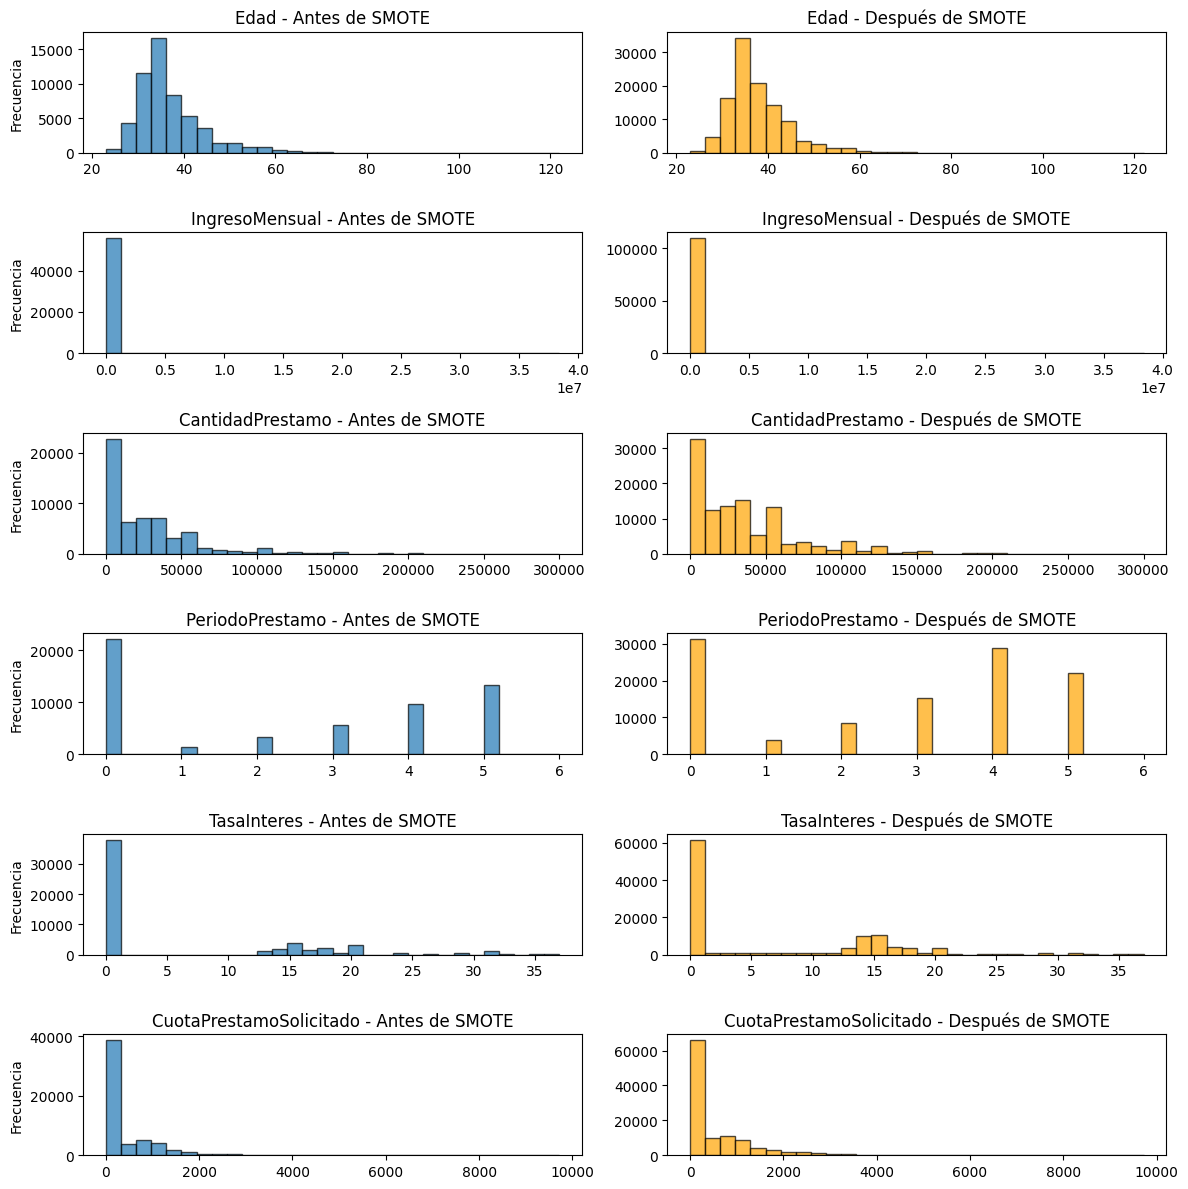

In [15]:
from imblearn.over_sampling import SMOTE
# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Crear DataFrames para antes y después de SMOTE
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train.columns)

# Seleccionar variables numéricas afectadas
columnas_afectadas = ["Edad", "IngresoMensual", "CantidadPrestamo", "PeriodoPrestamo", "TasaInteres", "CuotaPrestamoSolicitado"]

# Configurar la figura con subgráficos (2 columnas: Antes y Después)
fig, axes = plt.subplots(nrows=len(columnas_afectadas), ncols=2, figsize=(12, len(columnas_afectadas) * 2))

for i, col in enumerate(columnas_afectadas):
    # Histograma antes de SMOTE
    axes[i, 0].hist(X_train_df[col], bins=30, edgecolor="black", alpha=0.7)
    axes[i, 0].set_title(f"{col} - Antes de SMOTE")
    axes[i, 0].set_ylabel("Frecuencia")

    # Histograma después de SMOTE
    axes[i, 1].hist(X_train_smote_df[col], bins=30, edgecolor="black", alpha=0.7, color="orange")
    axes[i, 1].set_title(f"{col} - Después de SMOTE")

# Ajustar espacio entre gráficos
plt.tight_layout()
plt.show()


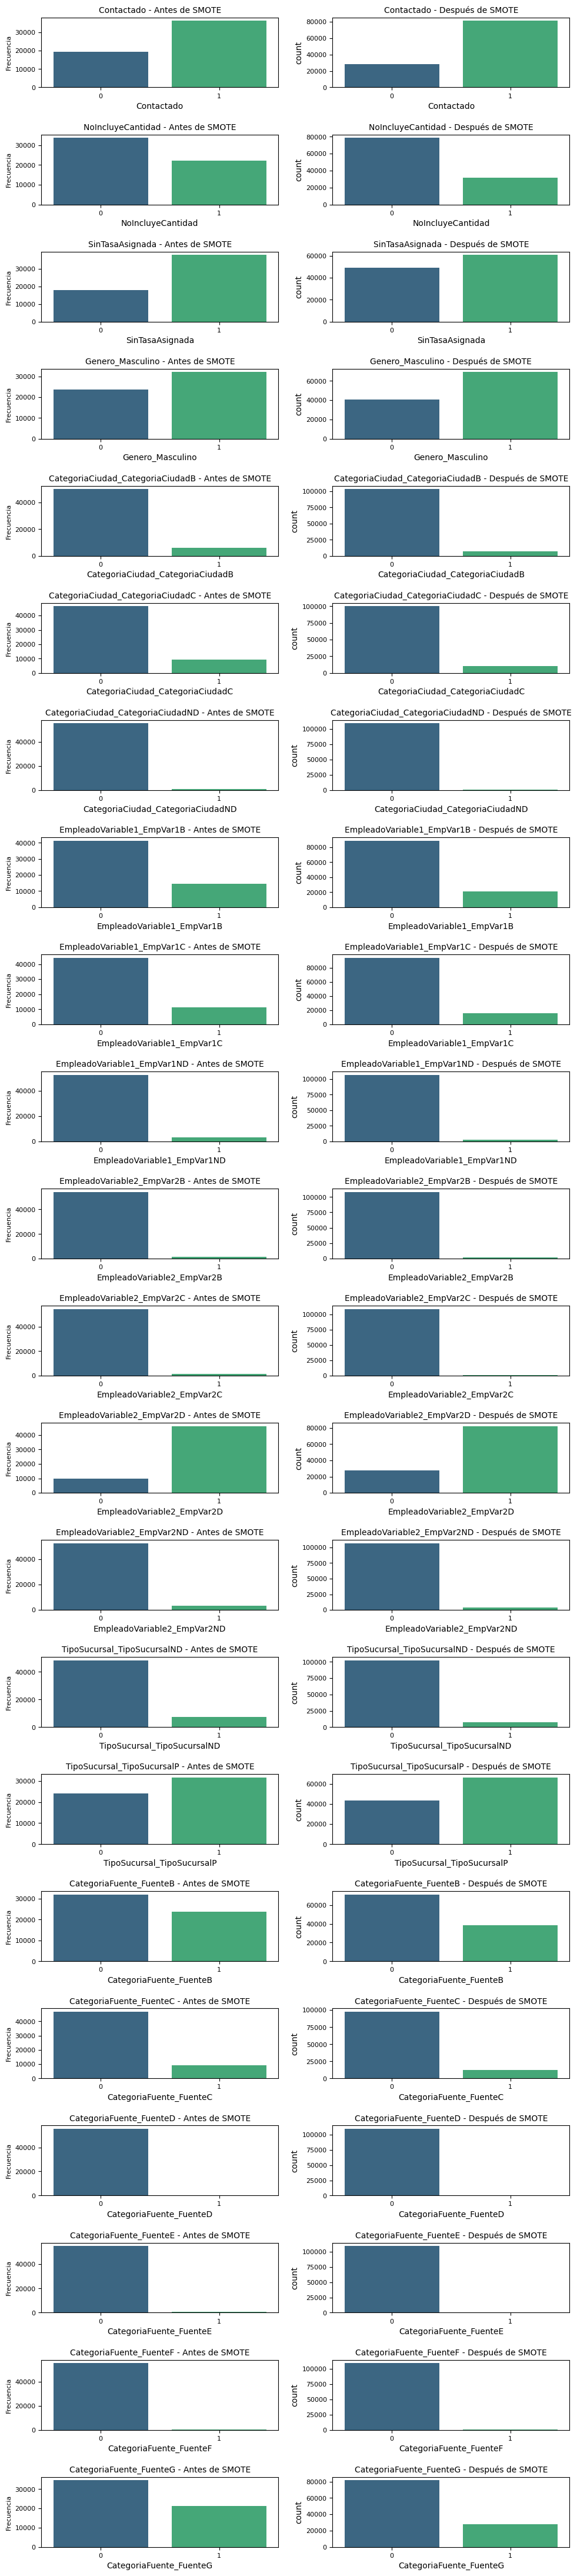

In [17]:
# Crear DataFrames para antes y después de SMOTE
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train.columns)

# Seleccionar solo variables binarias (las que tienen exactamente 2 valores únicos)
columnas_binarias = [col for col in X_train.columns if X_train[col].nunique() == 2]

# Configurar la figura más compacta
fig, axes = plt.subplots(nrows=len(columnas_binarias), ncols=2, figsize=(10, len(columnas_binarias) * 2))

for i, col in enumerate(columnas_binarias):
    # Distribución antes de SMOTE (Columna 1)
    sns.countplot(x=X_train_df[col], hue=X_train_df[col], palette="viridis", legend=False, ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} - Antes de SMOTE", fontsize=10)
    axes[i, 0].set_ylabel("Frecuencia", fontsize=8)
    axes[i, 0].tick_params(axis='both', labelsize=8)

    # Distribución después de SMOTE (Columna 2)
    sns.countplot(x=X_train_smote_df[col], hue=X_train_smote_df[col], palette="viridis", legend=False, ax=axes[i, 1])
    axes[i, 1].set_title(f"{col} - Después de SMOTE", fontsize=10)
    axes[i, 1].tick_params(axis='both', labelsize=8)

# Ajustar espacio entre gráficos
plt.tight_layout(pad=1.5)
plt.show()



In [20]:
# Crear un DataFrame con valores mínimos y máximos antes y después de SMOTE
valores_min_max = pd.DataFrame({
    "Variable": X_train.columns,
    "Min Antes": X_train.min().values,
    "Max Antes": X_train.max().values,
    "Min Después": X_train_smote.min().values,
    "Max Después": X_train_smote.max().values
})

# Filtrar solo las variables que tienen diferencias en los valores min/max
valores_fuera_rango = valores_min_max[
    (valores_min_max["Min Antes"] > valores_min_max["Min Después"]) |
    (valores_min_max["Max Antes"] < valores_min_max["Max Después"])
]

# Mostrar resultados
print(valores_fuera_rango)


Empty DataFrame
Columns: [Variable, Min Antes, Max Antes, Min Después, Max Después]
Index: []


In [21]:
# Seleccionar solo las variables binarias
columnas_binarias = [col for col in X_train.columns if set(X_train[col].unique()) == {0, 1}]

# Verificar si hay valores distintos de 0 y 1 en las variables binarias después de SMOTE
valores_invalidos = {}

for col in columnas_binarias:
    valores_unicos = set(X_train_smote[col].unique())
    if valores_unicos - {0, 1}:  # Si hay valores distintos de 0 y 1
        valores_invalidos[col] = valores_unicos

# Mostrar variables con valores fuera de lo esperado
print("Variables binarias con valores inesperados:", valores_invalidos if valores_invalidos else "No se encontraron valores inválidos")


Variables binarias con valores inesperados: No se encontraron valores inválidos


### Código para entrenar Random Forest sin balanceo y optimizar hiperparámetros

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Definir el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Definir la rejilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Validación cruzada con GridSearch
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_rf = grid_search.best_estimator_
print(f"🔹 Mejor combinación de hiperparámetros: {grid_search.best_params_}")

# Predicciones
y_pred = best_rf.predict(X_test)

# Evaluación del modelo
print("\n🔹 Reporte de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=1))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"\n🔹 ROC AUC Score: {roc_auc:.2f}")

# Matriz de confusión
print("\n🔹 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 54 candidates, totalling 270 fits
🔹 Mejor combinación de hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

🔹 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13739
           1       1.00      0.00      0.00       204

    accuracy                           0.99     13943
   macro avg       0.99      0.50      0.50     13943
weighted avg       0.99      0.99      0.98     13943


🔹 ROC AUC Score: 0.50

🔹 Matriz de Confusión:
[[13739     0]
 [  204     0]]


In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Diccionario para almacenar resultados
resultados = {}

# Random Forest con SMOTE (Oversampling)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    min_samples_leaf=2, 
    min_samples_split=10, 
    random_state=42, 
    n_jobs=-1
)

rf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_smote.predict(X_test)

resultados["SMOTE"] = {
    "classification_report": classification_report(y_test, y_pred_smote, output_dict=True, zero_division=1),
    "confusion_matrix": confusion_matrix(y_test, y_pred_smote),
    "roc_auc": roc_auc_score(y_test, y_pred_smote)
}

# Random Forest con Undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

rf_under = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    min_samples_leaf=2, 
    min_samples_split=10, 
    random_state=42, 
    n_jobs=-1
)

rf_under.fit(X_train_under, y_train_under)
y_pred_under = rf_under.predict(X_test)

resultados["Undersampling"] = {
    "classification_report": classification_report(y_test, y_pred_under, output_dict=True, zero_division=1),
    "confusion_matrix": confusion_matrix(y_test, y_pred_under),
    "roc_auc": roc_auc_score(y_test, y_pred_under)
}

#  Random Forest con Class Weights
rf_weighted = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    min_samples_leaf=2, 
    min_samples_split=10, 
    class_weight="balanced",  # Ajusta pesos automáticamente
    random_state=42, 
    n_jobs=-1
)

rf_weighted.fit(X_train, y_train)
y_pred_weighted = rf_weighted.predict(X_test)

resultados["Class Weights"] = {
    "classification_report": classification_report(y_test, y_pred_weighted, output_dict=True, zero_division=1),
    "confusion_matrix": confusion_matrix(y_test, y_pred_weighted),
    "roc_auc": roc_auc_score(y_test, y_pred_weighted)
}

# Mostrar resultados
for metodo, res in resultados.items():
    print(f"\n🔹 Resultados para {metodo}:")
    print("Matriz de Confusión:")
    print(res["confusion_matrix"])
    print("\nReporte de Clasificación:")
    print(res["classification_report"])
    print("\nROC AUC Score:", res["roc_auc"])



🔹 Resultados para SMOTE:
Matriz de Confusión:
[[12303  1436]
 [  138    66]]

Reporte de Clasificación:
{'0': {'precision': 0.9889076440800578, 'recall': 0.8954800203799403, 'f1-score': 0.939877769289534, 'support': 13739.0}, '1': {'precision': 0.043941411451398134, 'recall': 0.3235294117647059, 'f1-score': 0.07737397420867527, 'support': 204.0}, 'accuracy': 0.8871118123789715, 'macro avg': {'precision': 0.516424527765728, 'recall': 0.6095047160723231, 'f1-score': 0.5086258717491047, 'support': 13943.0}, 'weighted avg': {'precision': 0.9750818453669943, 'recall': 0.8871118123789715, 'f1-score': 0.9272584783050618, 'support': 13943.0}}

ROC AUC Score: 0.609504716072323

🔹 Resultados para Undersampling:
Matriz de Confusión:
[[9703 4036]
 [  46  158]]

Reporte de Clasificación:
{'0': {'precision': 0.99528156734024, 'recall': 0.7062377174466846, 'f1-score': 0.8262091280653951, 'support': 13739.0}, '1': {'precision': 0.037672865999046255, 'recall': 0.7745098039215687, 'f1-score': 0.0718508

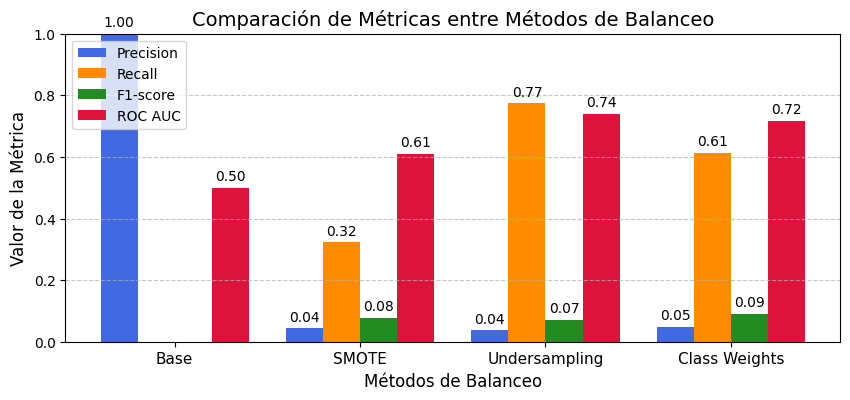

In [28]:
# Definir los métodos de balanceo
metodos = ["Base", "SMOTE", "Undersampling", "Class Weights"]

# Definir las métricas con los valores corregidos
precision = [1.00, 0.0439, 0.0376, 0.0488]  # Precisión clase 1
recall = [0.00, 0.3235, 0.7745, 0.6127]  # Recall clase 1
f1_score = [0.00, 0.0773, 0.0718, 0.0904]  # F1-score clase 1
roc_auc = [0.50, 0.6095, 0.7403, 0.7177]  # ROC AUC Score

# Crear gráfico de barras comparativo
x = np.arange(len(metodos))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(x - 1.5*width, precision, width, label='Precision', color='royalblue')
ax.bar(x - 0.5*width, recall, width, label='Recall', color='darkorange')
ax.bar(x + 0.5*width, f1_score, width, label='F1-score', color='forestgreen')
ax.bar(x + 1.5*width, roc_auc, width, label='ROC AUC', color='crimson')

# Etiquetas y formato
ax.set_xlabel("Métodos de Balanceo", fontsize=12)
ax.set_ylabel("Valor de la Métrica", fontsize=12)
ax.set_title("Comparación de Métricas entre Métodos de Balanceo", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metodos, fontsize=11)
ax.legend()

# Mostrar valores en las barras
for rect in ax.patches:
    height = rect.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}', 
                    xy=(rect.get_x() + rect.get_width() / 2, height), 
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

# Mostrar gráfico
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [33]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from IPython.display import display

# Configurar almacenamiento de resultados
resultados_balanceo = {
    "Desbalance": [],
    "SMOTE_Recall": [],
    "Undersampling_Recall": [],
    "ClassWeights_Recall": []
}

# Copia del dataset para manipulación
df_simulacion = df.copy()

# Porcentaje inicial de la clase minoritaria
total_positivos = df_simulacion[df_simulacion["Aprobado"] == 1].shape[0]

# Simulación: Eliminar iterativamente muestras de la clase minoritaria
for i in range(11):  # 11 iteraciones, eliminando progresivamente
    if total_positivos < 50:
        break  # No eliminar más si quedan muy pocos datos

    # Eliminar aleatoriamente parte de la clase minoritaria
    to_drop = df_simulacion[df_simulacion["Aprobado"] == 1].sample(50, random_state=42).index
    df_simulacion = df_simulacion.drop(to_drop)
    total_positivos -= 50

    # Separar variables
    X = df_simulacion.drop(["Aprobado"], axis=1)
    y = df_simulacion["Aprobado"]

    # Dividir en train/test
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    #  Aplicar SMOTE
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    rf_smote = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=2, min_samples_split=10, random_state=42, n_jobs=-1)
    rf_smote.fit(X_train_smote, y_train_smote)
    y_pred_smote = rf_smote.predict(X_test)
    recall_smote = classification_report(y_test, y_pred_smote, output_dict=True)["1"]["recall"]

    # Aplicar Undersampling
    undersample = RandomUnderSampler(random_state=42)
    X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

    rf_under = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=2, min_samples_split=10, random_state=42, n_jobs=-1)
    rf_under.fit(X_train_under, y_train_under)
    y_pred_under = rf_under.predict(X_test)
    recall_under = classification_report(y_test, y_pred_under, output_dict=True)["1"]["recall"]

    #  Aplicar Class Weights
    rf_weighted = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=2, min_samples_split=10, class_weight="balanced", random_state=42, n_jobs=-1)
    rf_weighted.fit(X_train, y_train)
    y_pred_weighted = rf_weighted.predict(X_test)
    recall_weighted = classification_report(y_test, y_pred_weighted, output_dict=True)["1"]["recall"]

    # Guardar resultados
    desbalance_actual = round((y_train.value_counts(normalize=True)[1]) * 100, 2)
    resultados_balanceo["Desbalance"].append(desbalance_actual)
    resultados_balanceo["SMOTE_Recall"].append(recall_smote)
    resultados_balanceo["Undersampling_Recall"].append(recall_under)
    resultados_balanceo["ClassWeights_Recall"].append(recall_weighted)

# Convertir resultados en DataFrame y mostrar
df_resultados_balanceo = pd.DataFrame(resultados_balanceo)
display(df_resultados_balanceo)


,Desbalance,SMOTE_Recall,Undersampling_Recall,ClassWeights_Recall
0,1.39,0.396907,0.871134,0.659794
1,1.32,0.304348,0.820652,0.608696
2,1.25,0.270115,0.798851,0.568966
3,1.18,0.335366,0.829268,0.597561
4,1.11,0.344156,0.811688,0.584416
5,1.04,0.305556,0.812500,0.555556
6,0.97,0.365672,0.820896,0.574627
7,0.89,0.290323,0.814516,0.508065
8,0.82,0.298246,0.850877,0.517544
9,0.75,0.221154,0.826923,0.442308


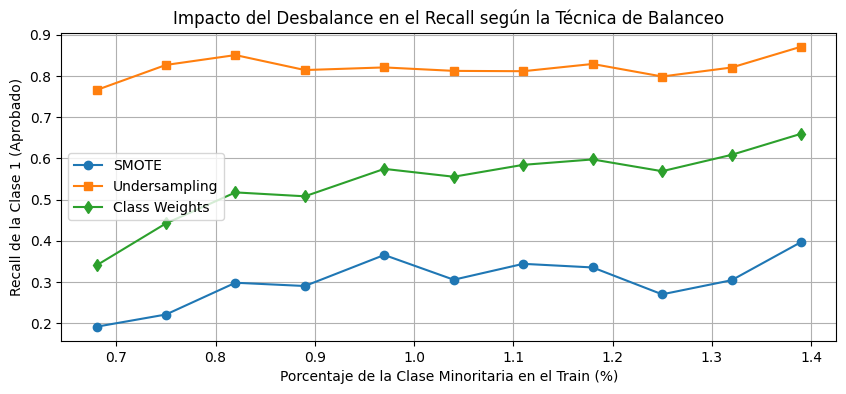

In [34]:
plt.figure(figsize=(10, 4))

# Graficar el recall de cada técnica
plt.plot(df_resultados_balanceo["Desbalance"], df_resultados_balanceo["SMOTE_Recall"], label="SMOTE", marker="o", linestyle="-")
plt.plot(df_resultados_balanceo["Desbalance"], df_resultados_balanceo["Undersampling_Recall"], label="Undersampling", marker="s", linestyle="-")
plt.plot(df_resultados_balanceo["Desbalance"], df_resultados_balanceo["ClassWeights_Recall"], label="Class Weights", marker="d", linestyle="-")

# Etiquetas y título
plt.xlabel("Porcentaje de la Clase Minoritaria en el Train (%)")
plt.ylabel("Recall de la Clase 1 (Aprobado)")
plt.title("Impacto del Desbalance en el Recall según la Técnica de Balanceo")
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()
